# Importy 

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from utils import *

# Zapoznanie z danymi

In [107]:
data = pd.read_csv(r'heart.csv')
data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [108]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [110]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


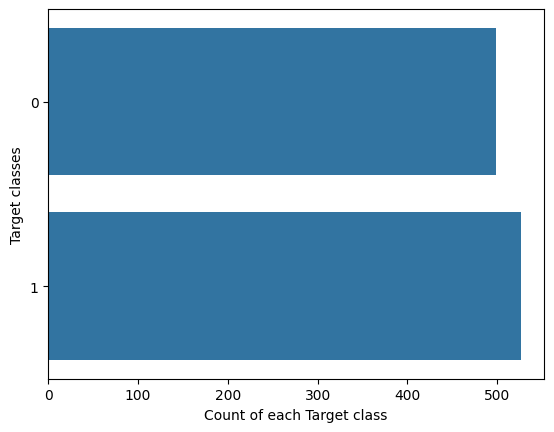

In [111]:
sns.countplot(y=data['target'] ,data=data)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

## Ponieważ nazwy kolumn są dość niejasne zmieniamy nazwy aby dalsze analizy były prostsze

In [112]:
data = data.rename(columns={'sex': 'płeć', 'age': 'wiek', 'cp': 'chest pain', 'trestbps': 'ciśnienie', 'fbs': 'cukier', 'restecg': 'wyniki el-kart', 'thalach': 'max tętno', 'exang': 'dławica wysiłek', 'ca':'liczba naczyń'})

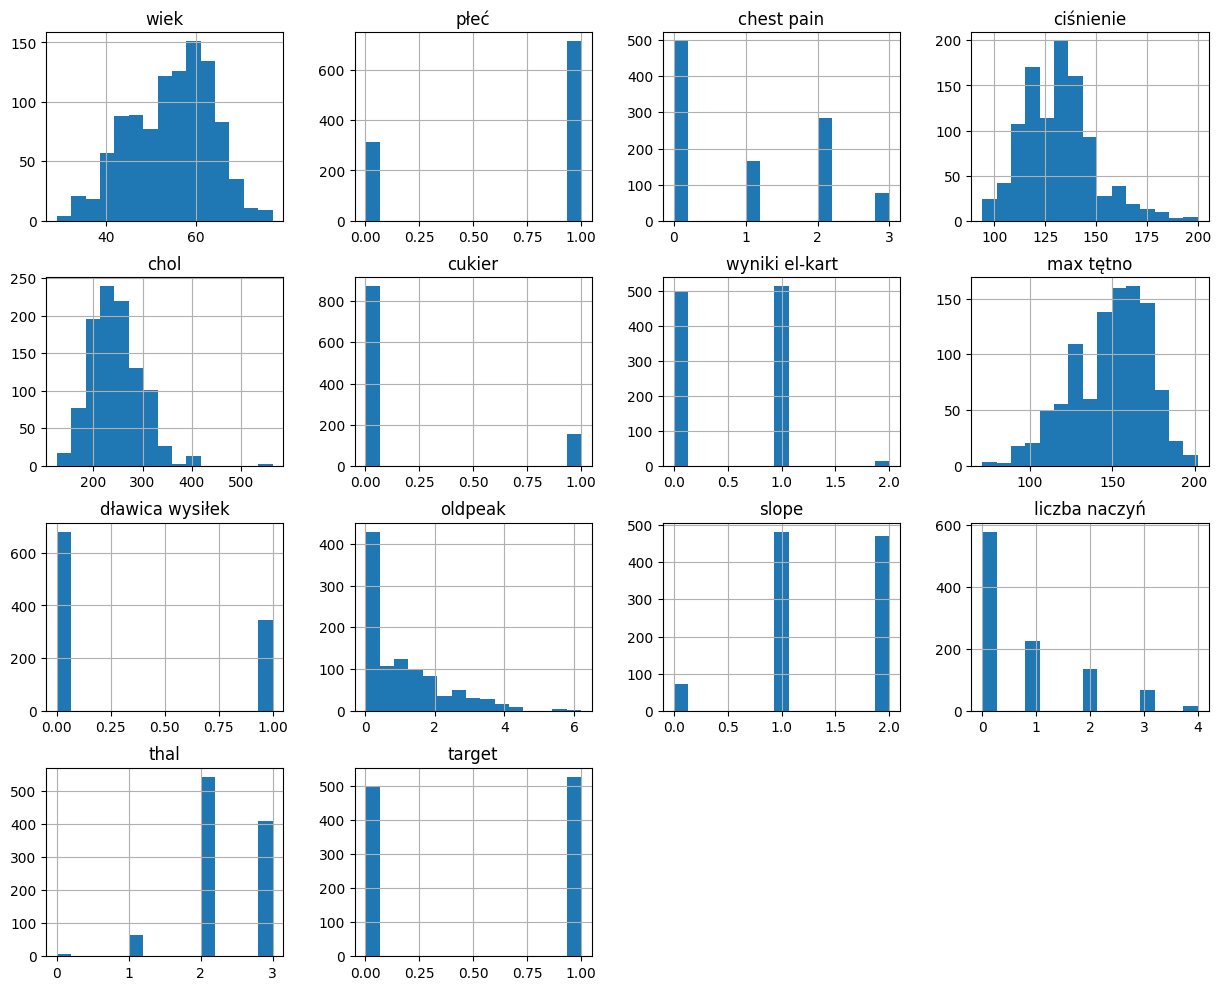

In [113]:
data.hist(figsize=(15,12),bins = 15)
plt.show()

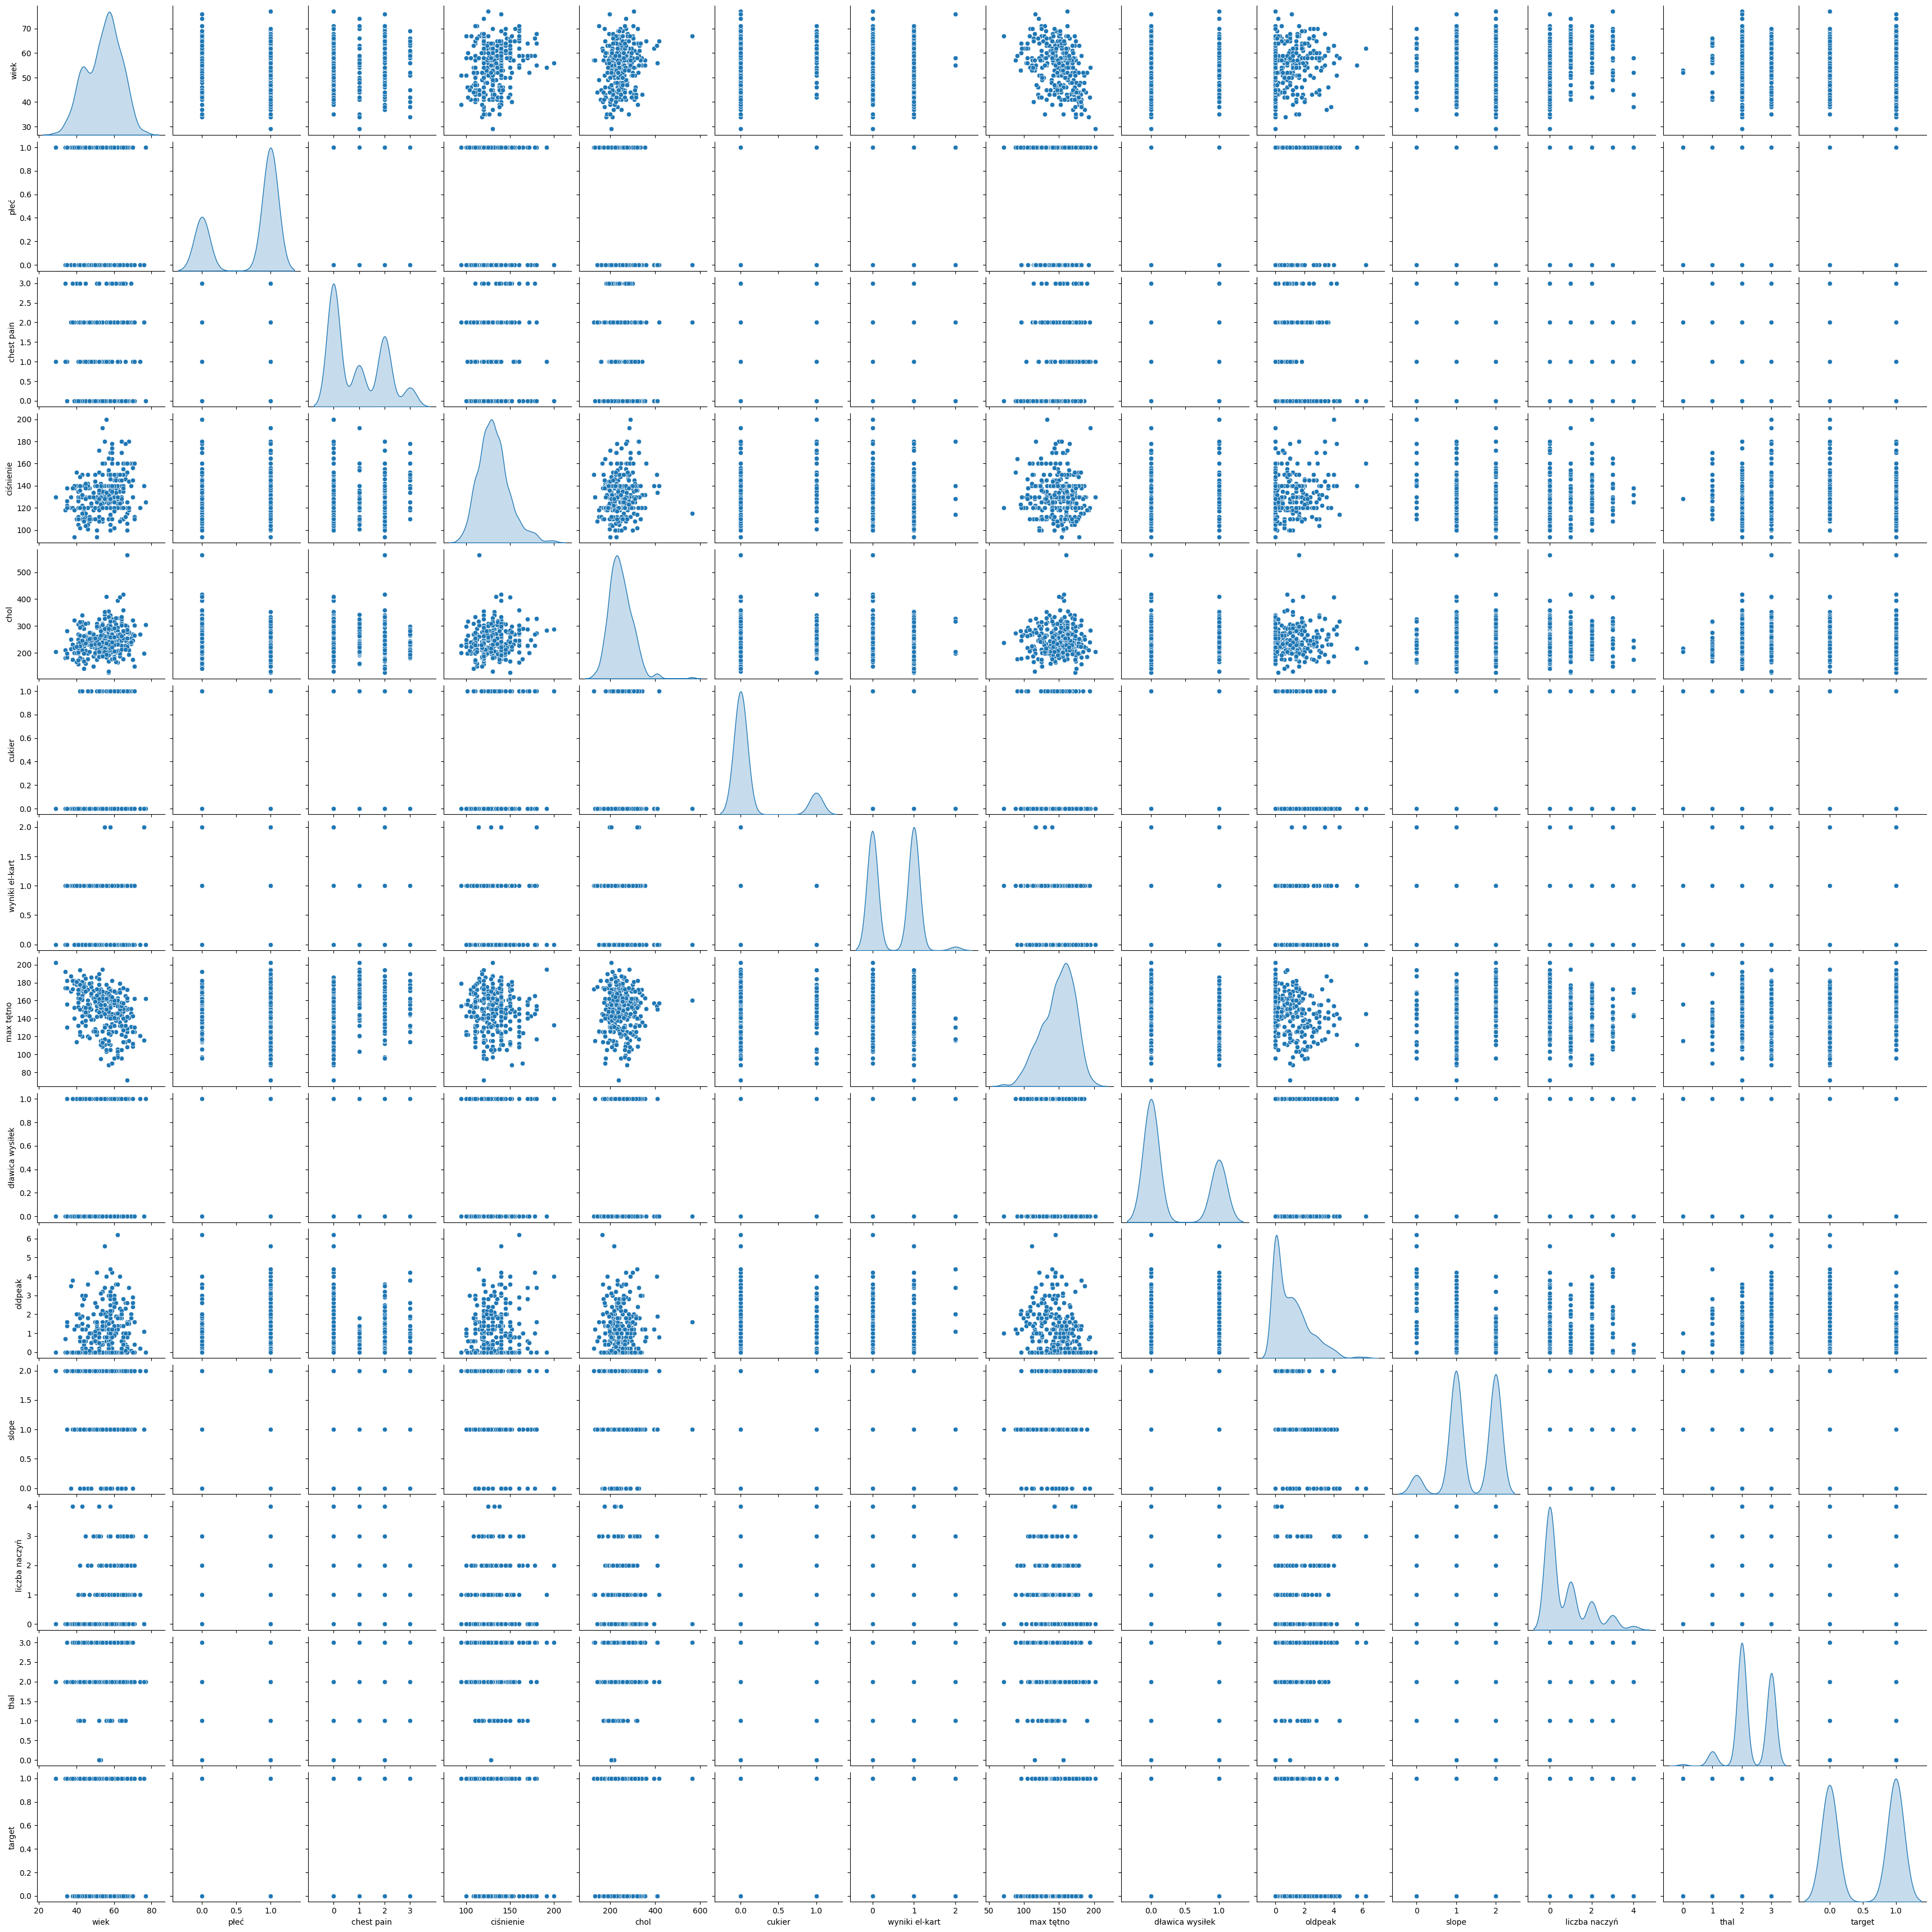

In [114]:
sns.pairplot(data, diag_kind='kde')   

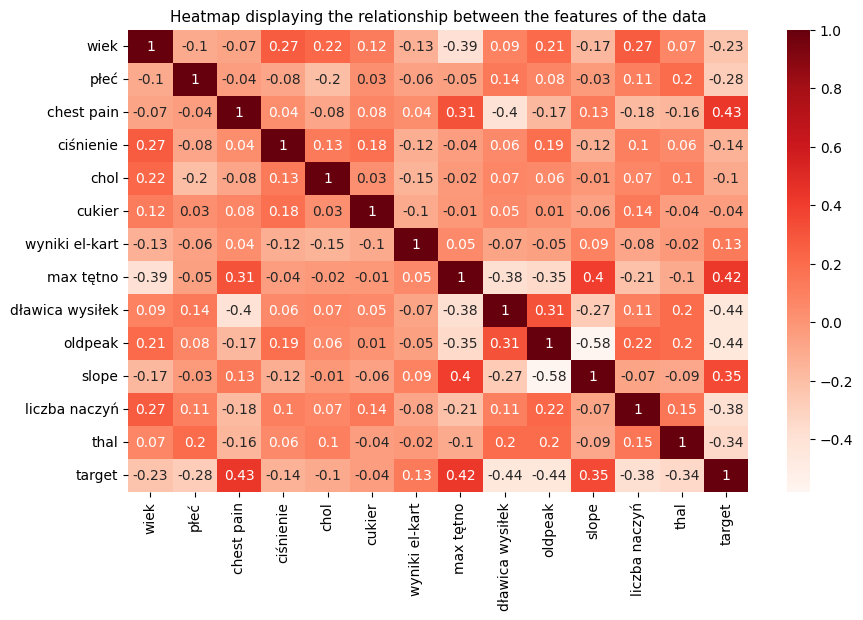

In [115]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr().round(2), cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the relationship between the features of the data',
         fontsize=11)
plt.show()

In [116]:
def signif_features(df, threshold=0.2, target='target'):
    correlations = df.corr()[target].abs().sort_values(ascending=False)
    significant_features = correlations[correlations > threshold]
    result = significant_features.reset_index().rename(columns={'index': 'Feature', target: 'Correlation'})
    return result

In [117]:
signif_features(data)

,Feature,Correlation
0,target,1.000000
1,oldpeak,0.438441
2,dławica wysiłek,0.438029
3,chest pain,0.434854
4,max tętno,0.422895
5,liczba naczyń,0.382085
6,slope,0.345512
7,thal,0.337838
8,płeć,0.279501
9,wiek,0.229324


In [118]:
def wykres(x,y):
    plt.figure(figsize=(8, 6))
    sns.regplot(data=data, x=x, y=y, line_kws={'color': 'red'}, scatter_kws={'alpha': 0.6})
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()


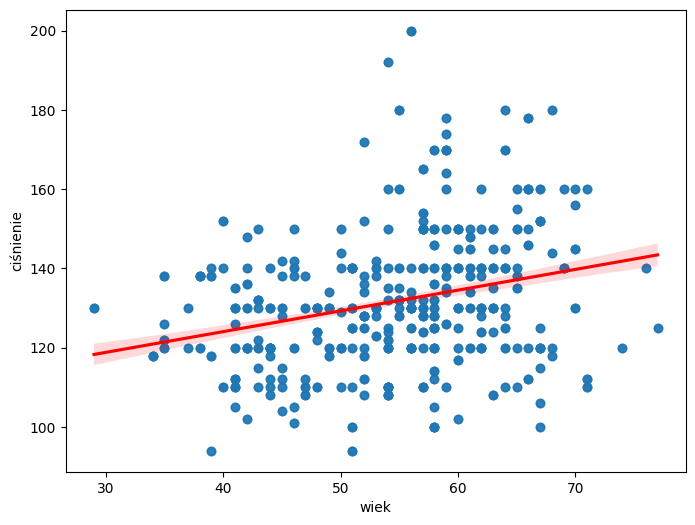

In [119]:
wykres('wiek', 'ciśnienie')

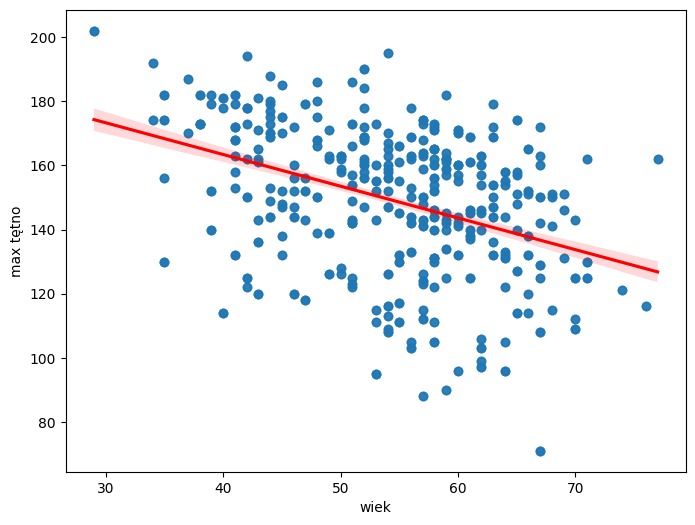

In [120]:
wykres('wiek', 'max tętno')

In [121]:
data.columns

Index(['wiek', 'płeć', 'chest pain', 'ciśnienie', 'chol', 'cukier',
       'wyniki el-kart', 'max tętno', 'dławica wysiłek', 'oldpeak', 'slope',
       'liczba naczyń', 'thal', 'target'],
      dtype='object')

In [122]:
columns = ['wiek', 'płeć', 'chest pain', 'ciśnienie', 'max tętno', 'dławica wysiłek', 'liczba naczyń', 'target']

In [123]:
for i in columns:
    print(i)
    print(data[i].unique())

wiek
[52 53 70 61 62 58 55 46 54 71 43 34 51 50 60 67 45 63 42 44 56 57 59 64
 65 41 66 38 49 48 29 37 47 68 76 40 39 77 69 35 74]
płeć
[1 0]
chest pain
[0 1 2 3]
ciśnienie
[125 140 145 148 138 100 114 160 120 122 112 132 118 128 124 106 104 135
 130 136 180 129 150 178 146 117 152 154 170 134 174 144 108 123 110 142
 126 192 115  94 200 165 102 105 155 172 164 156 101]
max tętno
[168 155 125 161 106 122 140 145 144 116 136 192 156 142 109 162 165 148
 172 173 146 179 152 117 115 112 163 147 182 105 150 151 169 166 178 132
 160 123 139 111 180 164 202 157 159 170 138 175 158 126 143 141 167  95
 190 118 103 181 108 177 134 120 171 149 154 153  88 174 114 195 133  96
 124 131 185 194 128 127 186 184 188 130  71 137  99 121 187  97  90 129
 113]
dławica wysiłek
[0 1]
liczba naczyń
[2 0 1 3 4]
target
[0 1]


# Statystyki 

In [125]:
data['wiek_kat'] = [None for i in data['wiek']]
for i in range(len(data['wiek'])):
    row = data['wiek'].iloc[i]
    if row < 12:
        data['wiek_kat'].iloc[i] = 'dziecko'
    elif row < 40:
        data['wiek_kat'].iloc[i] = 'młody dorosły'
    elif row < 60:
        data['wiek_kat'].iloc[i] = 'dorosły'
    else:
        data['wiek_kat'].iloc[i] = 'emeryt'

C:\Users\aleks\AppData\Local\Temp\ipykernel_72428\2642941483.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['wiek_kat'].iloc[i] = 'dorosły'
C:\Users\aleks\AppData\Local\Temp\ipykernel_72428\2642941483.py:9: SettingWithCopyWarning: 

In [ ]:
def wykres_słupkowy(column):
    barplot = sns.barplot(data[column].value_counts(normalize=True) * 100)
    plt.title(column)
    for p in barplot.patches:
        barplot.annotate(format(p.get_height(), '.1f'),  # Wartość do wyświetlenia
                        (p.get_x() + p.get_width() / 2., p.get_height()),  # Pozycja tekstu
                        ha='center', va='center',      # Wyrównanie
                        fontsize=10, color='black',   # Styl tekstu
                        xytext=(0, 5),                # Przesunięcie w pionie
                        textcoords='offset points')   # Jednostka przesunięcia

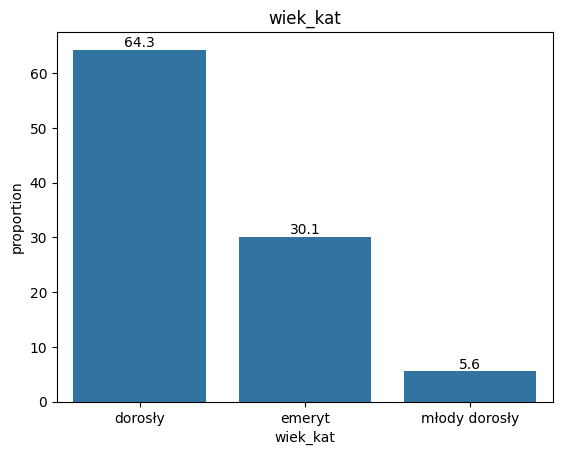

In [127]:
wykres_słupkowy('wiek_kat')

In [128]:
for i in range(len(data['ciśnienie'])):
    row = data['ciśnienie'].iloc[i]
    if row < 120:
        data['ciśnienie'].iloc[i] = 'optymalne'
    elif row < 150:
        data['ciśnienie'].iloc[i] = 'st 1'
    elif row < 180:
        data['ciśnienie'].iloc[i] = 'st 2'
    else:
        data['ciśnienie'].iloc[i] = 'st 3'

C:\Users\aleks\AppData\Local\Temp\ipykernel_72428\4098399371.py:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['ciśnienie'].iloc[i] = 'st 1'
C:\Users\aleks\AppData\Local\Temp\ipykernel_72428\4098399371.py:6: SettingWithCopyWarning: 
A

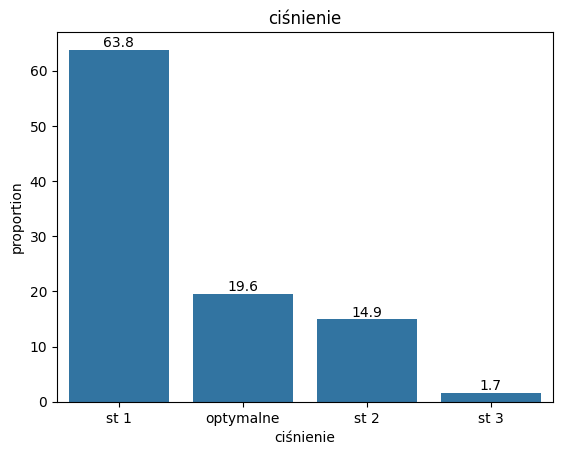

In [129]:
wykres_słupkowy('ciśnienie')

In [130]:
for i in range(len(data['max tętno'])):
    row = data['max tętno'].iloc[i]
    row2 = data['wiek'].iloc[i]
    if row < 0.5 * (220 - row2):
        data['max tętno'].iloc[i] = 'za niskie'
    elif row < 0.85 * (220 - row2):
        data['max tętno'].iloc[i] = 'optymalne'
    else:
        data['max tętno'].iloc[i] = 'za wysokie'

C:\Users\aleks\AppData\Local\Temp\ipykernel_72428\632174628.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['max tętno'].iloc[i] = 'za wysokie'
C:\Users\aleks\AppData\Local\Temp\ipykernel_72428\632174628.py:9: SettingWithCopyWarning

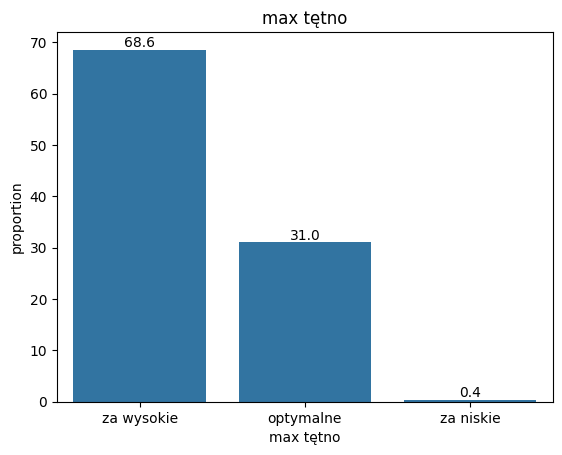

In [131]:
wykres_słupkowy('max tętno')

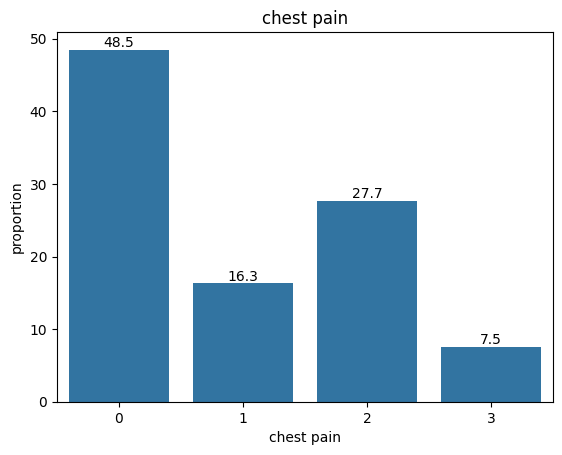

In [132]:
wykres_słupkowy('chest pain')

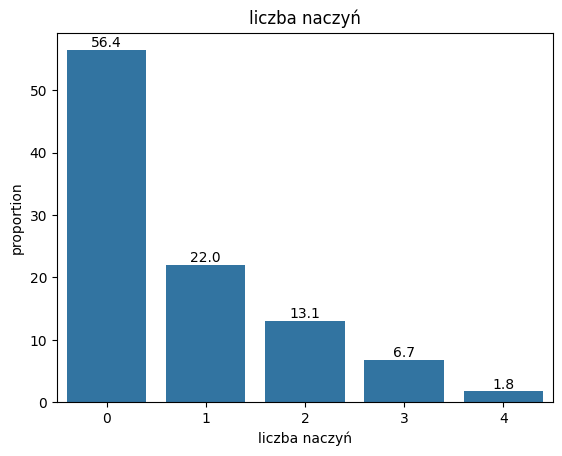

In [133]:
wykres_słupkowy('liczba naczyń')

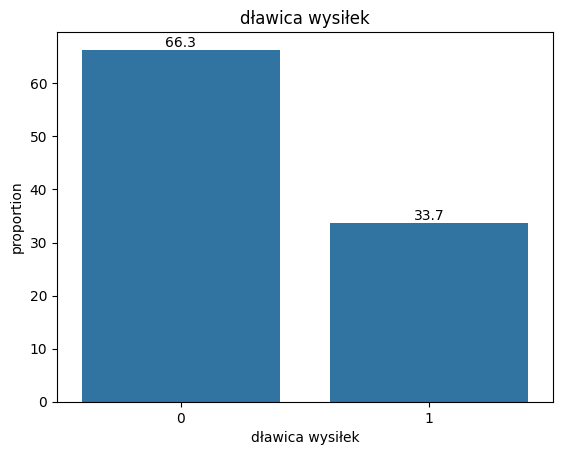

In [135]:
wykres_słupkowy('dławica wysiłek')

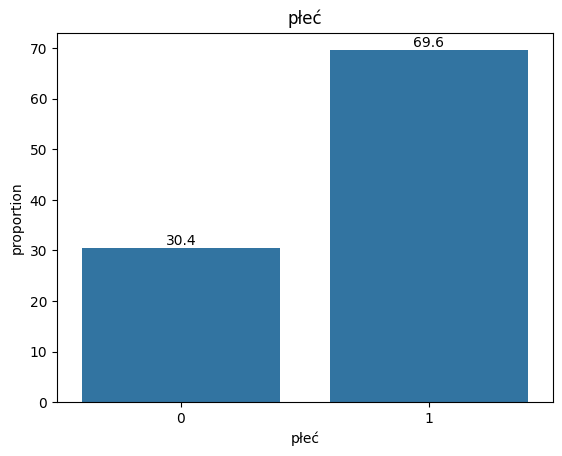

In [136]:
wykres_słupkowy('płeć')

In [ ]:
barplot = sns.barplot(data['liczba naczyń'].value_counts(normalize=True) * 100)


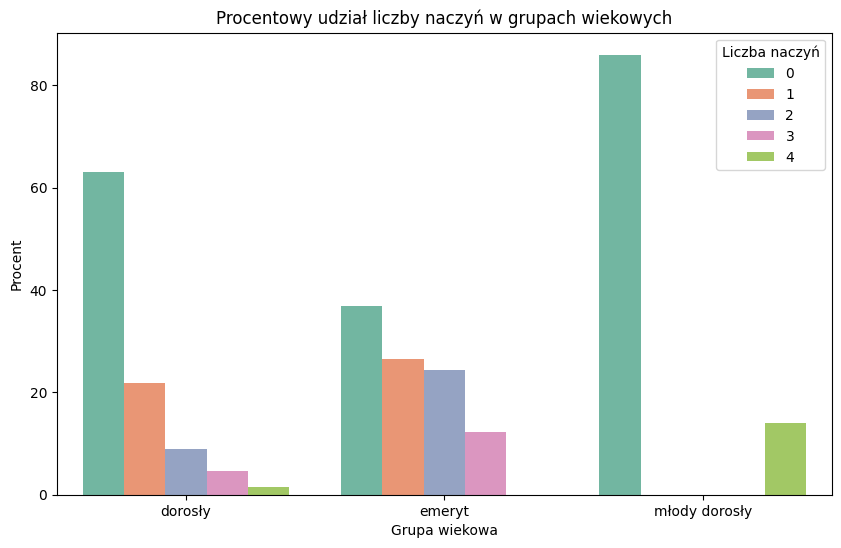

In [ ]:
grouped = data.groupby(['wiek_kat', 'liczba naczyń']).size().unstack()
percentages = (grouped.T / grouped.sum(axis=1)).T * 100

percentages = percentages.reset_index().melt(id_vars='wiek_kat', var_name='liczba naczyń', value_name='procent')

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=percentages, x='wiek_kat', y='procent', hue='liczba naczyń', palette='Set2')
plt.title('Procentowy udział liczby naczyń w grupach wiekowych')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%',  # Wartość z 1 miejscem po przecinku
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Pozycja tekstu
                ha='center', va='center',      # Wyrównanie
                fontsize=10, color='black',   # Styl tekstu
                xytext=(0, 5),                # Przesunięcie w pionie
                textcoords='offset points')   # Jednostka przesunięcia
plt.xlabel('Grupa wiekowa')
plt.ylabel('Procent')
plt.legend(title='Liczba naczyń')
plt.show()


In [146]:
grouped = data.groupby(['wiek_kat', 'liczba naczyń']).size().unstack()
percentages = (grouped.T / grouped.sum(axis=1)).T * 100
percentages

liczba naczyń,0,1,2,3,4
wiek_kat,,,,,
dorosły,62.974203,21.851290,8.952959,4.704097,1.517451
emeryt,36.893204,26.537217,24.271845,12.297735,NaN
młody dorosły,85.964912,NaN,NaN,NaN,14.035088


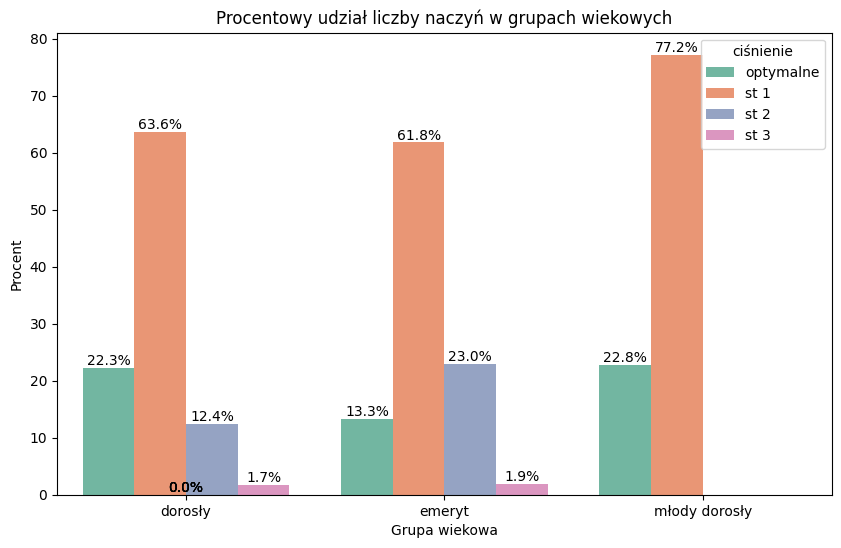

In [147]:
grouped = data.groupby(['wiek_kat', 'ciśnienie']).size().unstack()
percentages = (grouped.T / grouped.sum(axis=1)).T * 100

percentages = percentages.reset_index().melt(id_vars='wiek_kat', var_name='ciśnienie', value_name='procent')

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=percentages, x='wiek_kat', y='procent', hue='ciśnienie', palette='Set2')
plt.title('Procentowy udział liczby naczyń w grupach wiekowych')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%',  # Wartość z 1 miejscem po przecinku
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Pozycja tekstu
                ha='center', va='center',      # Wyrównanie
                fontsize=10, color='black',   # Styl tekstu
                xytext=(0, 5),                # Przesunięcie w pionie
                textcoords='offset points')   # Jednostka przesunięcia
plt.xlabel('Grupa wiekowa')
plt.ylabel('Procent')
plt.legend(title='ciśnienie')
plt.show()

In [154]:
grouped = data.groupby(['wiek_kat', 'chest pain', 'max tętno']).size().unstack(fill_value=0)
percentages = round((grouped.T / grouped.sum(axis=1)).T * 100, 2)
percentages = percentages.reset_index().melt(id_vars=['wiek_kat', 'chest pain'], var_name='max tętno', value_name='procent')

In [155]:
percentages.sort_values(by =['chest pain', 'max tętno'])

,wiek_kat,chest pain,max tętno,procent
0,dorosły,0,optymalne,50.66
4,emeryt,0,optymalne,34.83
8,młody dorosły,0,optymalne,73.33
12,dorosły,0,za niskie,0.00
16,emeryt,0,za niskie,2.25
20,młody dorosły,0,za niskie,0.00
24,dorosły,0,za wysokie,49.34
28,emeryt,0,za wysokie,62.92
32,młody dorosły,0,za wysokie,26.67
1,dorosły,1,optymalne,5.22


In [157]:
data.columns

Index(['wiek', 'płeć', 'chest pain', 'ciśnienie', 'chol', 'cukier',
       'wyniki el-kart', 'max tętno', 'dławica wysiłek', 'oldpeak', 'slope',
       'liczba naczyń', 'thal', 'target', 'wiek_kat'],
      dtype='object')

In [160]:
grouped = data.groupby(['max tętno', 'dławica wysiłek']).size().unstack(fill_value=0)
percentages = round((grouped.T / grouped.sum(axis=1)).T * 100, 2)
percentages = percentages.reset_index().melt(id_vars=['max tętno'], var_name='dławica wysiłek', value_name='procent')
percentages

,max tętno,dławica wysiłek,procent
0,optymalne,0,42.14
1,za niskie,0,100.00
2,za wysokie,0,77.10
3,optymalne,1,57.86
4,za niskie,1,0.00
5,za wysokie,1,22.90


In [171]:
data['target_tak'] = (data['target'] == 1).astype(int)
data['target_nie'] = (data['target'] == 0).astype(int)

grouped = data.groupby(['ciśnienie', 'liczba naczyń', 'płeć', 'dławica wysiłek']).agg({'target_tak': 'sum', 'target_nie': 'sum'}).reset_index()

total = grouped[['target_tak', 'target_nie']].sum(axis=1)  # Suma dla każdej grupy
grouped['target_tak_percent'] = round((grouped['target_tak'] / total) * 100,2)
grouped['target_nie_percent'] = round((grouped['target_nie'] / total) * 100,2)

grouped_long = grouped.melt(id_vars=['ciśnienie', 'liczba naczyń', 'płeć', 'dławica wysiłek'],
                            value_vars=['target_tak_percent', 'target_nie_percent'],
                            var_name='target', value_name='procent')

grouped_long['target'] = grouped_long['target'].map({'target_tak_percent': 'tak', 'target_nie_percent': 'nie'})
grouped_long = grouped_long.sort_values(['ciśnienie', 'liczba naczyń', 'płeć', 'dławica wysiłek'], ascending=[True, True, False, False])
grouped

,ciśnienie,liczba naczyń,płeć,dławica wysiłek,target_tak,target_nie,target_tak_percent,target_nie_percent
0,optymalne,0,0,0,37,0,100.00,0.00
1,optymalne,0,0,1,3,0,100.00,0.00
2,optymalne,0,1,0,35,18,66.04,33.96
3,optymalne,0,1,1,16,4,80.00,20.00
4,optymalne,1,0,0,13,0,100.00,0.00
5,optymalne,1,1,0,3,17,15.00,85.00
6,optymalne,1,1,1,4,23,14.81,85.19
7,optymalne,2,0,0,3,0,100.00,0.00
8,optymalne,2,0,1,0,4,0.00,100.00
9,optymalne,2,1,0,0,3,0.00,100.00
